# Time Series Intermittency and Distribution Analysis

This notebook analyzes:
1. The percentage of zero values (intermittency)
2. Value distribution
3. Basic statistics

for each time series in the BPI2019 dataset.

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import yaml

# Set style for better visualizations\n",
plt.style.use('seaborn-v0_8-darkgrid')  # Updated style name\n",
sns.set_theme()  # Set seaborn defaults
sns.set_palette('husl')

# Configure figure size and DPI for better resolution"
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['figure.dpi'] = 100

In [26]:
# Load configuration
with open('../config/preprocessing_config.yaml') as f:
    config = yaml.safe_load(f)

# Load BPI2019 time series data
dataset = 'BPI2019_1'

data_path = Path('../data/processed/time_series_df.h5')
df = pd.read_hdf(data_path, key=dataset)

## Calculate Intermittency Statistics

In [35]:
def calculate_intermittency_stats(df):
    """Calculate intermittency statistics for each time series"""
    stats = pd.DataFrame()
    
    # Calculate zero percentage
    stats['zero_percentage'] = (df == 0).mean() * 100
    
    # Calculate basic statistics
    stats['mean'] = df.mean()
    stats['median'] = df.median()
    stats['std'] = df.std()
    stats['max'] = df.max()
    stats['min'] = df.min()
    
    # Calculate percentiles
    for p in [25, 75, 90, 95, 99]:
        stats[f'percentile_{p}'] = df.quantile(p/100)
    
    return stats

# Calculate statistics
intermittency_stats = calculate_intermittency_stats(df)

# Sort by zero percentage
intermittency_stats_sorted = intermittency_stats.sort_values('zero_percentage', ascending=False)

# Display top 10 most intermittent series
print("Top 10 most intermittent time series:")
display(intermittency_stats_sorted.head(10))

# save to csv
intermittency_stats.to_csv(f'../results/time_series_analysis/{dataset}_intermittency_stats.csv')

Top 10 most intermittent time series:


,zero_percentage,mean,median,std,max,min,percentile_25,percentile_75,percentile_90,percentile_95,percentile_99
Vendor creates invoice -> ■,99.674267,0.035831,0.0,0.627803,11,0,0.0,0.0,0.0,0.0,0.00
Change Approval for Purchase Order -> Block Purchase Order Item,99.674267,0.328990,0.0,5.764374,101,0,0.0,0.0,0.0,0.0,0.00
Change Price -> Receive Order Confirmation,99.348534,0.247557,0.0,4.280670,75,0,0.0,0.0,0.0,0.0,0.00
Create Purchase Order Item -> Release Purchase Order,99.348534,0.504886,0.0,6.527654,101,0,0.0,0.0,0.0,0.0,0.00
Clear Invoice -> Remove Payment Block,99.022801,0.280130,0.0,4.267949,74,0,0.0,0.0,0.0,0.0,0.00
Change Price -> Cancel Goods Receipt,99.022801,0.234528,0.0,2.715914,40,0,0.0,0.0,0.0,0.0,0.00
Change Approval for Purchase Order -> Release Purchase Order,99.022801,0.527687,0.0,5.320608,54,0,0.0,0.0,0.0,0.0,0.00
Change Approval for Purchase Order -> Record Goods Receipt,98.371336,0.032573,0.0,0.321731,5,0,0.0,0.0,0.0,0.0,1.00
Change Approval for Purchase Order -> Change Price,98.371336,0.205212,0.0,2.205216,35,0,0.0,0.0,0.0,0.0,4.76
Release Purchase Order -> Change Approval for Purchase Order,98.371336,1.032573,0.0,8.389550,101,0,0.0,0.0,0.0,0.0,54.00


## Zero Percentages Across Time Series

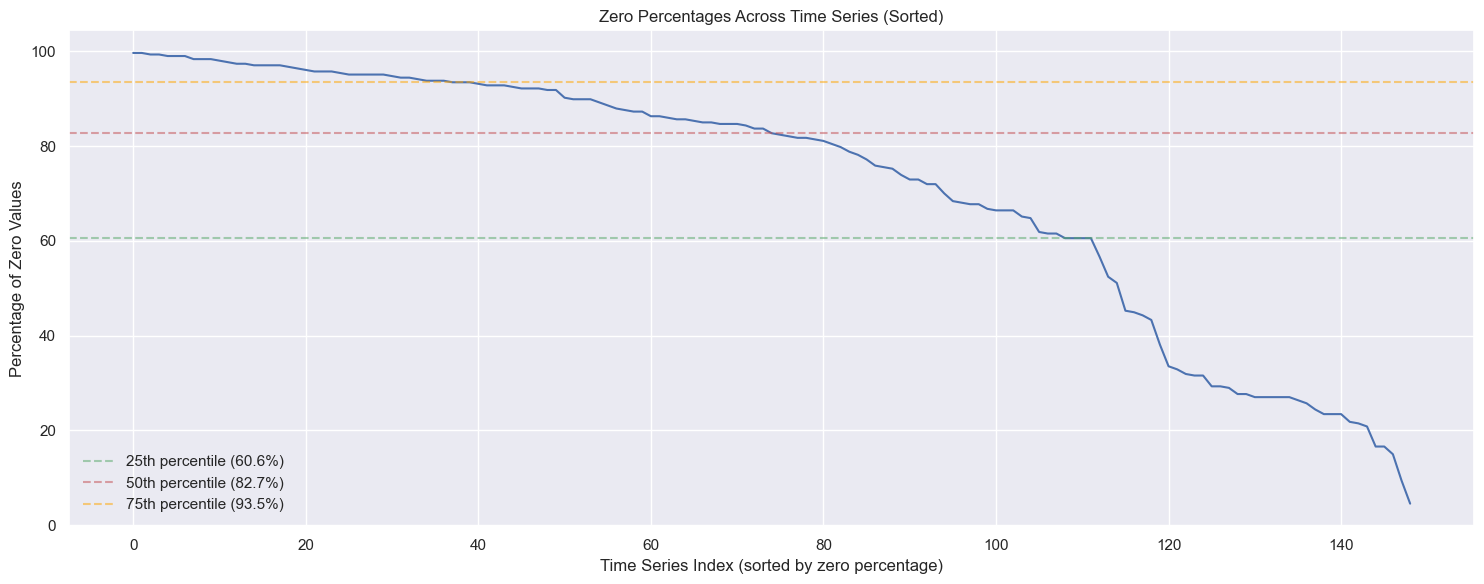


Zero percentage distribution across time series:
Number of time series: 149
Range: 4.6% - 99.7%
Median: 82.7%


In [28]:
# Create a sorted plot of zero percentages
plt.figure(figsize=(15, 6))
sorted_zero_percentages = intermittency_stats_sorted['zero_percentage']
plt.plot(range(len(sorted_zero_percentages)), sorted_zero_percentages, 'b-')
plt.title('Zero Percentages Across Time Series (Sorted)')
plt.xlabel('Time Series Index (sorted by zero percentage)')
plt.ylabel('Percentage of Zero Values')
plt.grid(True)

# Add horizontal lines for different percentage levels
percentiles = [25, 50, 75]
colors = ['g', 'r', 'orange']
for p, c in zip(percentiles, colors):
    p_value = sorted_zero_percentages.quantile(p/100)
    plt.axhline(y=p_value, color=c, linestyle='--', alpha=0.5, 
                label=f'{p}th percentile ({p_value:.1f}%)')

plt.legend()
plt.tight_layout()
plt.show()

# Print some statistics about the distribution
print("\nZero percentage distribution across time series:")
print(f"Number of time series: {len(sorted_zero_percentages)}")
print(f"Range: {sorted_zero_percentages.min():.1f}% - {sorted_zero_percentages.max():.1f}%")
print(f"Median: {sorted_zero_percentages.median():.1f}%")

## Visualize Intermittency Distribution

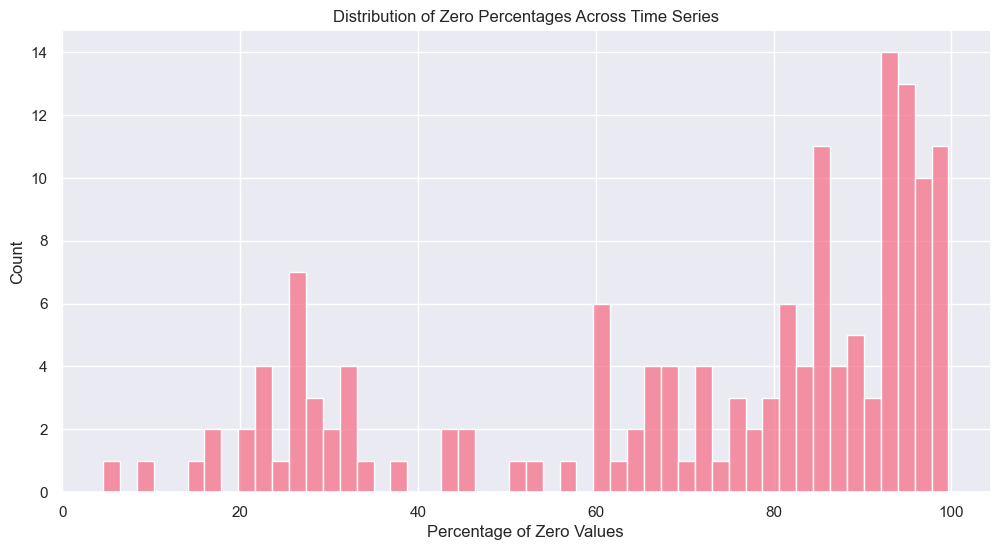


Summary of zero percentages:
count    149.000000
mean      71.630632
std       26.915584
min        4.560261
25%       60.586319
50%       82.736156
75%       93.485342
max       99.674267
Name: zero_percentage, dtype: float64


In [29]:
plt.figure(figsize=(12, 6))
sns.histplot(data=intermittency_stats['zero_percentage'], bins=50)
plt.title('Distribution of Zero Percentages Across Time Series')
plt.xlabel('Percentage of Zero Values')
plt.ylabel('Count')
plt.show()

# Print summary statistics
print("\nSummary of zero percentages:")
print(intermittency_stats['zero_percentage'].describe())

## Analyze Value Distribution

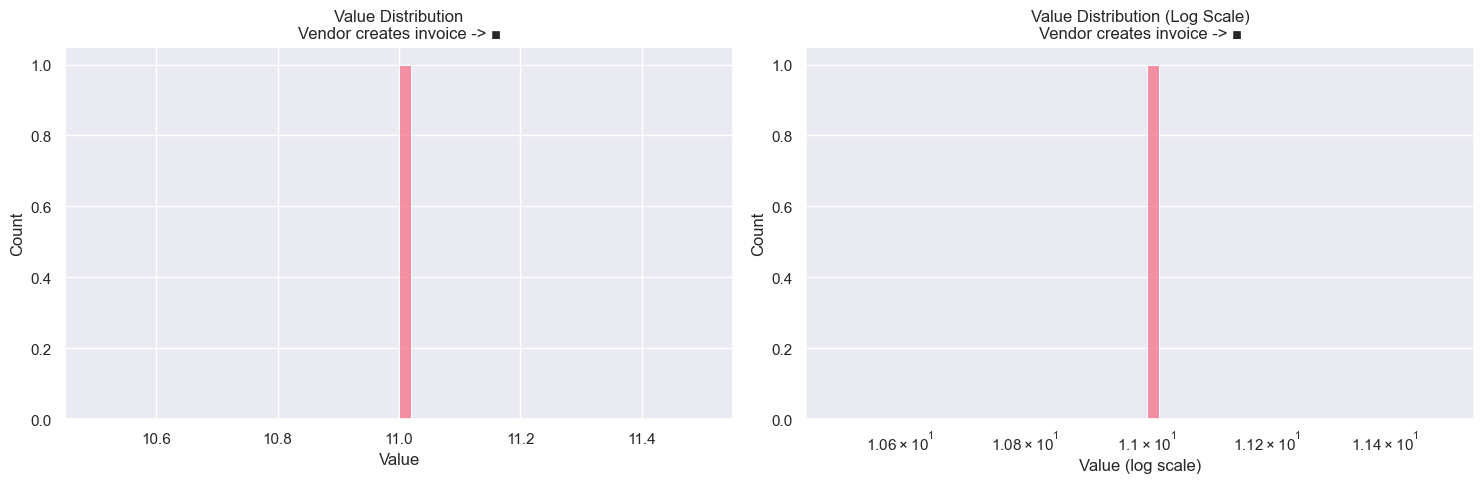

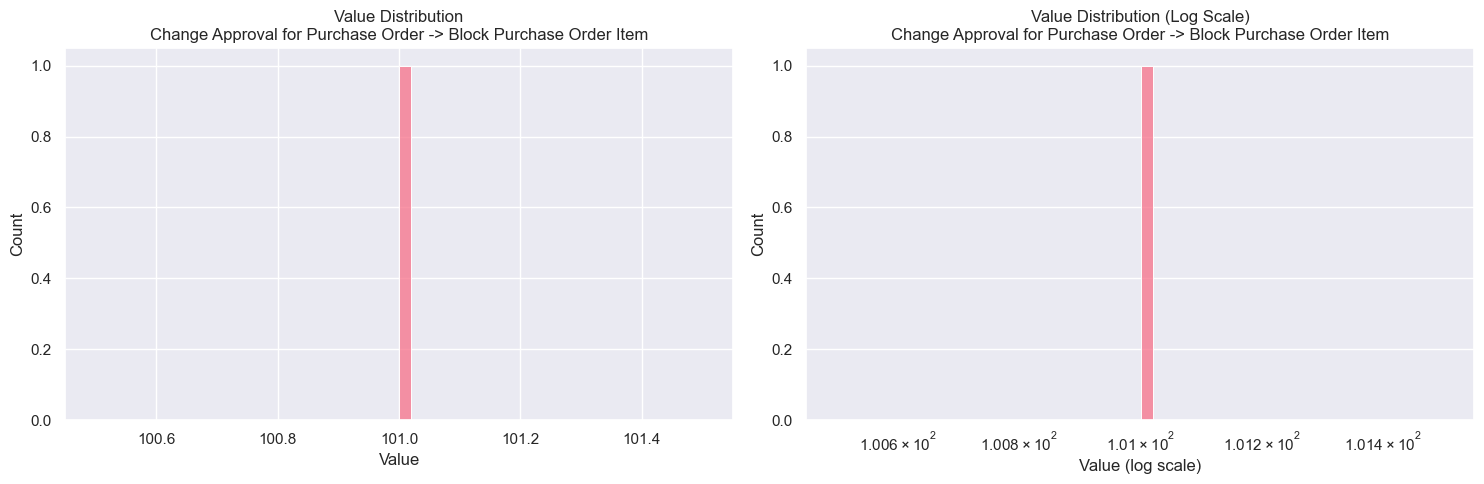

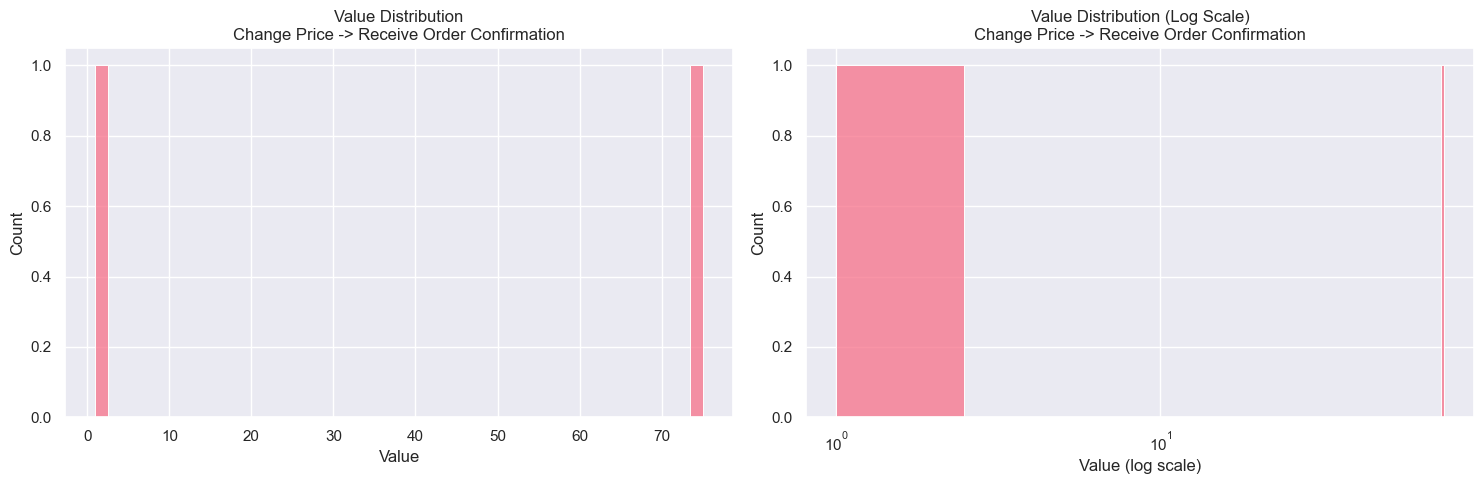

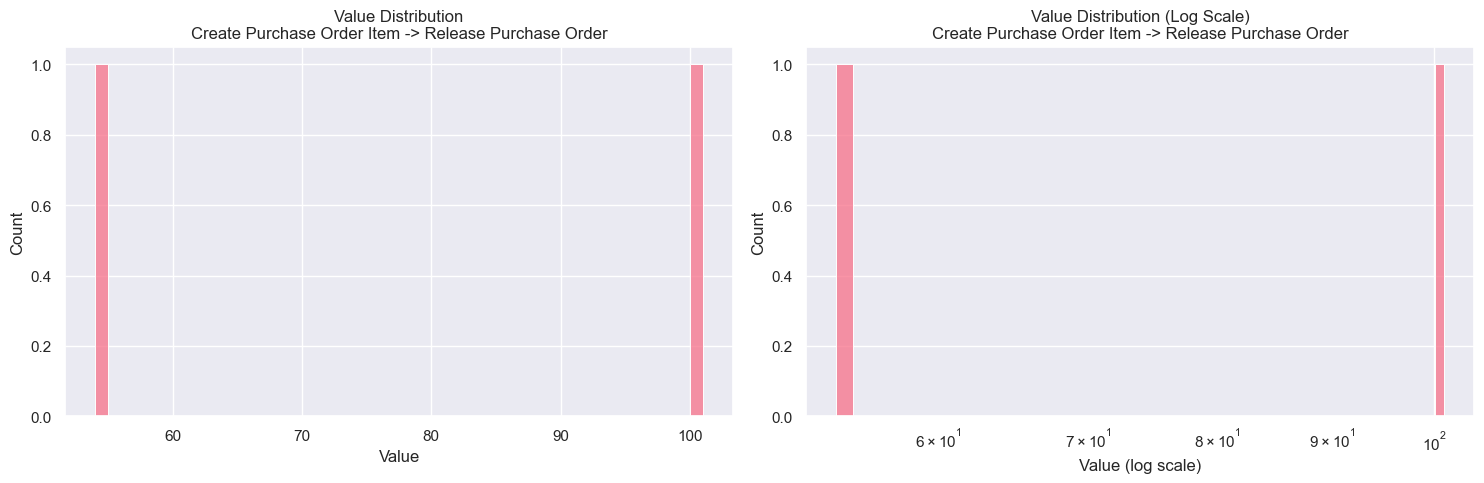

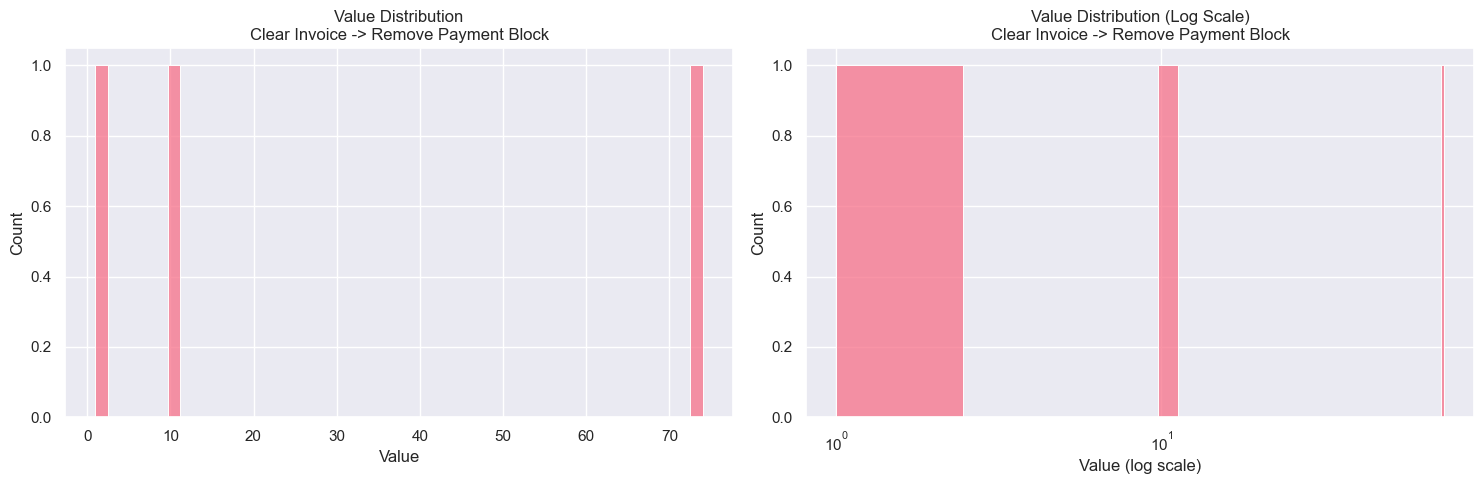

In [30]:
def plot_value_distribution(df, series_name, exclude_zeros=True):
    """Plot value distribution for a specific time series"""
    values = df[series_name]
    if exclude_zeros:
        values = values[values != 0]
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Regular histogram
    sns.histplot(data=values, bins=50, ax=ax1)
    ax1.set_title(f'Value Distribution\n{series_name}')
    ax1.set_xlabel('Value')
    
    # Log-scale histogram
    sns.histplot(data=values, bins=50, ax=ax2)
    ax2.set_xscale('log')
    ax2.set_title(f'Value Distribution (Log Scale)\n{series_name}')
    ax2.set_xlabel('Value (log scale)')
    
    plt.tight_layout()
    plt.show()

# Plot distributions for top 5 most intermittent series
for series_name in intermittency_stats_sorted.head().index:
    plot_value_distribution(df, series_name)

## Identify Extreme Values

In [31]:
def analyze_extreme_values(df, threshold_percentile=99):
    """Analyze extreme values in each time series"""
    extreme_stats = pd.DataFrame()
    
    for column in df.columns:
        series = df[column]
        threshold = series.quantile(threshold_percentile/100)
        extreme_values = series[series > threshold]
        
        extreme_stats.loc[column, 'threshold'] = threshold
        extreme_stats.loc[column, 'n_extreme_values'] = len(extreme_values)
        extreme_stats.loc[column, 'extreme_percentage'] = (len(extreme_values) / len(series)) * 100
        extreme_stats.loc[column, 'max_value'] = series.max()
        extreme_stats.loc[column, 'extreme_mean'] = extreme_values.mean()
    
    return extreme_stats

# Analyze extreme values
extreme_stats = analyze_extreme_values(df)
extreme_stats_sorted = extreme_stats.sort_values('extreme_percentage', ascending=False)

print("Top 10 series with most extreme values:")
display(extreme_stats_sorted.head(10))

Top 10 series with most extreme values:


,threshold,n_extreme_values,extreme_percentage,max_value,extreme_mean
Record Goods Receipt -> Record Invoice Receipt,640.50,4.0,1.302932,741.0,688.75
Record Goods Receipt -> Change Price,17.82,4.0,1.302932,37.0,29.00
Vendor creates invoice -> Clear Invoice,40.88,4.0,1.302932,52.0,46.75
Record Invoice Receipt -> Vendor creates invoice,58.70,4.0,1.302932,85.0,70.25
Create Purchase Order Item -> Change Price,76.94,4.0,1.302932,169.0,110.25
Vendor creates debit memo -> Record Goods Receipt,19.94,4.0,1.302932,49.0,32.25
Vendor creates invoice -> Vendor creates debit memo,26.88,4.0,1.302932,49.0,38.75
Cancel Goods Receipt -> Cancel Invoice Receipt,25.92,4.0,1.302932,55.0,34.25
Create Purchase Order Item -> Change Quantity,81.88,4.0,1.302932,88.0,85.00
Change Quantity -> Change Quantity,8.94,4.0,1.302932,23.0,15.25


## Export Results

In [32]:
# Combine all statistics
final_stats = pd.concat([
    intermittency_stats,
    extreme_stats
], axis=1)

# Save to CSV
output_path = Path('../results/time_series_analysis')
output_path.mkdir(parents=True, exist_ok=True)
final_stats.to_csv(output_path / f'{dataset}_time_series_analysis.csv')

print("Analysis results saved to:", output_path / f'{dataset}_time_series_analysis.csv')

Analysis results saved to: ../results/time_series_analysis/BPI2019_1_time_series_analysis.csv
